In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 19.7MB/s 
     |████████████████████████████████| 15.3MB 326kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=eb23c787520d9747d034d2a30b4b2ea6103b69eb9a483643b238cd20068fe664
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import pyLDAvis
import pyLDAvis.sklearn
import pandas as pd

# Read Data

In [ ]:
comments_prep = pd.read_pickle('/content/comments_prep_full.pickle')
comments_prep.sort_values(by=['character'], inplace=True)
comments_prep.head()

,title,author,comment,like,character,prep
0,[B대면데이트]#1. 첫번째 데이트 방재호/33/다단계,피식대학Psick Univ,B대면데이트 첫번째 소개팅남<br />방재호 instagram@BJH_Dreamlife,592,방재호,대면 데이트 소개팅 방재 instagramBJHDreamlife
23794,[B대면데이트]#3. 퇴근길 데이트 방재호/33/다단계,미자,이 사람 나태지옥은 안갈듯,193,방재호,사람 나태 지옥
23795,[B대면데이트]#3. 퇴근길 데이트 방재호/33/다단계,성이름,이사람은 눈이 신기해 눈이 거꾸로 뒤집어 진 것 같음,0,방재호,사람
23796,[B대면데이트]#3. 퇴근길 데이트 방재호/33/다단계,커멘더지코박죽,이분이 저희반 담임선생님 이십니다.,0,방재호,담임선생
23797,[B대면데이트]#3. 퇴근길 데이트 방재호/33/다단계,뽀이뽀이,어후,0,방재호,


In [ ]:
comments_prep[-5:]

,title,author,comment,like,character,prep
41926,[B대면데이트]#4 네번째 대면데이트 최준/35/카페사장,꽃개,세계 5대 현자 1.예수 2.소크라테스 3. 붓다 4.공자 5. 최준 카메라맨,0,최준,세계 현자 예수 소크라테스 붓다 공자 최준 카메라맨
41925,[B대면데이트]#4 네번째 대면데이트 최준/35/카페사장,Jongchul Beck,하.. 미친놈처럼 웃으면서 짜증내는 내모습을보니 준며든것같다...,44,최준,미친놈 짜증 모습
41924,[B대면데이트]#4 네번째 대면데이트 최준/35/카페사장,에그피피,자꾸 자기 공격적이라고 시도때도 없이 키스드립치는데 막상 키스 존나 못하면 개빡칠 ...,1079,최준,공격 시도 키스 키스
41922,[B대면데이트]#4 네번째 대면데이트 최준/35/카페사장,김용명,저 욕해도 되나요?,0,최준,
6001,[B대면데이트]#1. 첫번째 데이트 최준/34/카페사장,다영,카페 사장 맞냐고 물었는데 왜 틀렸다고 해요??,0,최준,카페 사장


In [ ]:
character_list = sorted(comments_prep['character'].unique())

In [ ]:
print(character_list)

['방재호', '이호창', '임플란티드키드', '차진석', '최준']


# Best Model

In [ ]:
def my_tokenizer(text):
  return text.split()

In [ ]:
# Find best model

# Define Search Param
                # 'n_components':[2, 5, 10, 15, 20], 'learning_decay':[0.5, 0.7, 0.9]
                # 'n_components':[2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
search_params = {'n_components':[10], 'max_iter': [1, 10, 15, 20, 25, 30, 40, 50]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(TfidfVectorizer(tokenizer=my_tokenizer).fit_transform(comments_prep['prep'].loc[comments_prep['character']=='방재호']))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:440: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more d

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [ ]:
# Best Model

best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(TfidfVectorizer(tokenizer=my_tokenizer).fit_transform(comments_prep['prep'].loc[comments_prep['character']=='방재호'])))

Best Model's Params:  {'n_components': 10}
Best Log Likelihood Score:  -31561.145545834803
Model Perplexity:  9988.641957527068


In [ ]:
model.cv_results_

{'mean_fit_time': array([12.46635933, 13.56278033, 12.83518529, 13.41605406, 13.74355192,
        12.26249795, 13.4883204 , 12.85035462, 13.26471624, 13.7636797 ,
        12.15190544, 13.55835409, 12.908149  , 13.26371064, 13.85672364]),
 'mean_score_time': array([0.15099015, 0.16385665, 0.15555191, 0.15727029, 0.16123586,
        0.14300838, 0.16731224, 0.16253815, 0.16301823, 0.16415925,
        0.14205608, 0.17107558, 0.16629167, 0.15936074, 0.16603637]),
 'mean_test_score': array([-21272.85629619, -25976.3038731 , -31419.93314384, -35651.4098477 ,
        -39269.68425599, -21268.32263332, -25979.26269516, -31434.69226358,
        -35594.18693395, -39230.09317036, -21269.068454  , -26016.80063984,
        -31431.97959757, -35662.94982516, -39281.86683774]),
 'param_learning_decay': masked_array(data=[0.5, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 0.9,
                    0.9, 0.9, 0.9, 0.9],
              mask=[False, False, False, False, False, False, False, False,
             

In [ ]:
log_likelihoods_5

array([-21272.85629619, -25976.3038731 , -31419.93314384, -35651.4098477 ,
       -39269.68425599])

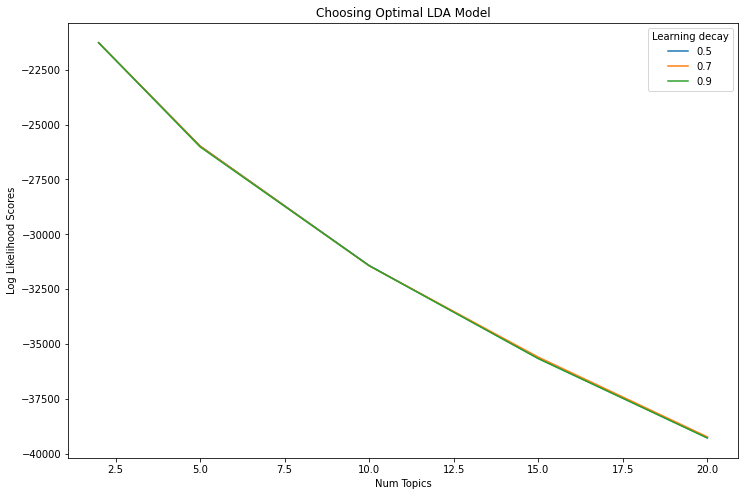

In [ ]:
# learning decay

n_topics = [2, 5, 10, 15, 20]
log_likelihoods_5 = np.array([model.cv_results_['mean_test_score'][i] for i, gscore in enumerate(model.cv_results_['param_learning_decay']) if gscore==0.5])
log_likelihoods_7 = np.array([model.cv_results_['mean_test_score'][i] for i, gscore in enumerate(model.cv_results_['param_learning_decay']) if gscore==0.7])
log_likelihoods_9 = np.array([model.cv_results_['mean_test_score'][i] for i, gscore in enumerate(model.cv_results_['param_learning_decay']) if gscore==0.9])

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelihoods_5, label='0.5')
plt.plot(n_topics, log_likelihoods_7, label='0.7')
plt.plot(n_topics, log_likelihoods_9, label='0.9')
plt.xlim(2,20)
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelihood Scores")
plt.legend(title='Learning decay', loc='best')
plt.savefig('learning_decay.jpg')
plt.show()

In [ ]:
model.cv_results_

{'mean_fit_time': array([ 1.28447957,  3.05140924,  5.19644532,  7.23196268,  9.3573535 ,
        11.42091255, 13.43826947]),
 'mean_score_time': array([0.18262   , 0.1728426 , 0.16323905, 0.1702302 , 0.17357378,
        0.16514239, 0.16215191]),
 'mean_test_score': array([-33425.71767044, -31795.68282093, -31561.03049751, -31488.71701784,
        -31477.85724314, -31427.79639704, -31414.37854969]),
 'param_max_iter': masked_array(data=[1, 5, 10, 15, 20, 25, 30],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_components': masked_array(data=[10, 10, 10, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_iter': 1, 'n_components': 10},
  {'max_iter': 5, 'n_components': 10},
  {'max_iter': 10, 'n_components': 10},
  {'max_iter': 15, 'n_components': 10},
  {'max_iter': 20, 'n_components': 10},
  {'max_i

In [ ]:
# n_components

n_topics = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
log_likelihoods = np.array([gscore for gscore in model.cv_results_['mean_test_score']])

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelihoods)
plt.xlim(2,100)
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelihood Scores")
plt.savefig('learning_decay_100.jpg')
plt.show()

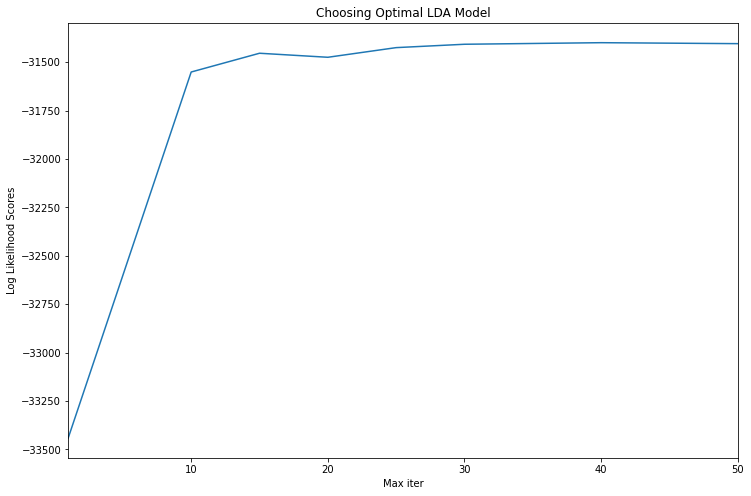

In [ ]:
# max_iter

n_iter = [1,10,15,20,25,30,40,50]
log_likelihoods = np.array([model.cv_results_['mean_test_score'][i] for i, gscore in enumerate(model.cv_results_['param_max_iter'])])

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_iter, log_likelihoods, label='1')
plt.xlim(1,50)
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Max iter")
plt.ylabel("Log Likelihood Scores")
plt.savefig('max_iter_10.jpg')
plt.show()

In [ ]:
# Perplexity

tfidf_vect = list()
tfidf = list()
lda = list()
lda_output = list()
n_components = list(range(2,21))

for i, n in enumerate(n_components):
  tfidf_vect.append(TfidfVectorizer(tokenizer=my_tokenizer))
  tfidf.append(tfidf_vect[i].fit_transform(comments_prep['prep'].loc[comments_prep['character']=='방재호']))
  lda.append(LatentDirichletAllocation(n_components = n, 
                                  max_iter = 30,
                                  learning_method = 'online',
                                  random_state = 39))
  lda[i].fit_transform(tfidf[i])
  lda_output.append([lda[i].perplexity(tfidf[i])])

In [ ]:
lda_output

[[2708.586415808663],
 [3435.1945757746535],
 [4204.220819461229],
 [4978.465051667006],
 [5673.291557523009],
 [6289.782973041278],
 [6999.676405464618],
 [7711.547089014168],
 [8312.498863672368],
 [9015.430019017913],
 [9569.192065784497],
 [10270.494767339123],
 [10929.455406027088],
 [11599.832982217677],
 [12426.727148578091],
 [12967.013066712409],
 [13790.489060254748],
 [14523.614051497643],
 [15228.563353288277]]

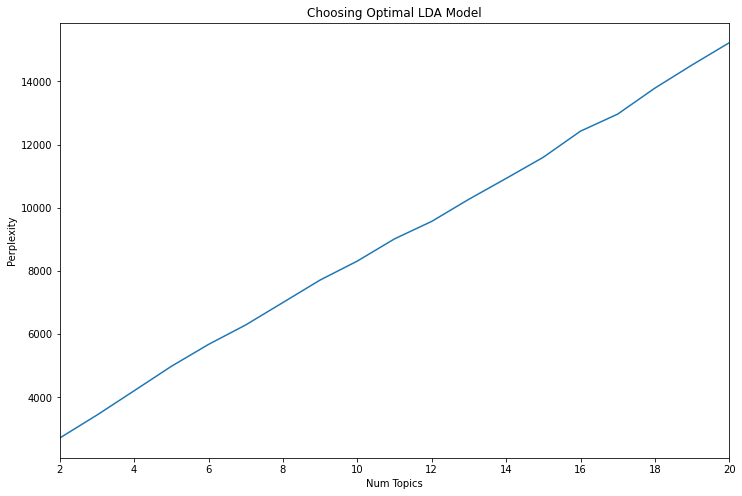

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(n_components, lda_output)
plt.xlim(2,20)
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")
plt.savefig('perplexity.jpg')
plt.show()

In [ ]:
files.download('perplexity.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling

In [ ]:
character_list = ['방재호', '이호창', '임플란티드키드', '차진석', '최준']

In [ ]:
# Topic Modeling

tfidf_vect = list()
tfidf = list()
lda = list()
lda_output = list()
n_components = 10
max_iter = 30

for i, character in enumerate(character_list):
  tfidf_vect.append(TfidfVectorizer(tokenizer=my_tokenizer))
  tfidf.append(tfidf_vect[i].fit_transform(comments_prep['prep'].loc[comments_prep['character']==character]))
  lda.append(LatentDirichletAllocation(n_components = n_components, 
                                  max_iter = max_iter,
                                  learning_method = 'online',
                                  random_state = 39))
  lda_output.append([lda[i].fit_transform(tfidf[i])])

# Visualizing

In [ ]:
# Visualizing

pyLDAvis.enable_notebook()

vis = list()
for i in range(len(character_list)):
  vis.append(pyLDAvis.sklearn.prepare(lda[i], tfidf[i], tfidf_vect[i], mds='tsne'))
  # pyLDAvis.display(vis[i])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t

In [ ]:
pyLDAvis.display(vis[0])

In [ ]:
pyLDAvis.display(vis[1])

In [ ]:
pyLDAvis.display(vis[2])

In [ ]:
pyLDAvis.display(vis[3])

In [ ]:
pyLDAvis.display(vis[4])

In [ ]:
name = 'Modeling_' + str(n_components) + '_' + str(max_iter) + '_'
pyLDAvis.save_html(vis[0], name+'방재호.html')
pyLDAvis.save_html(vis[1], name+'이호창.html')
pyLDAvis.save_html(vis[2], name+'임플란티드키드.html')
pyLDAvis.save_html(vis[3], name+'차진석.html')
pyLDAvis.save_html(vis[4], name+'최준.html')

In [ ]:
files.download(name+'방재호.html')
files.download(name+'이호창.html')
files.download(name+'임플란티드키드.html')
files.download(name+'차진석.html')
files.download(name+'최준.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def get_topics(components, feature_names, n=20): # parameter : (topics, words, number of words)
  topic_list = list()
  topic_arg = list()
  for topic in components:
    topic_arg.extend(topic.argsort()[:-n-1:-1])
    topic_list.extend([(feature_names[i], topic[i].round(2)) for i in topic_arg[-n:]])
  return topic_list, topic_arg

In [ ]:
topics = list()
topics_idx = list()
for i in range(len(lda)):
  temp1, temp2 = get_topics(lda[i].components_, tfidf_vect[i].get_feature_names(), n=30)
  topics.append(temp1)
  topics_idx.append(temp2)

In [ ]:
topics[0]

[('이렇', 75.34),
 ('호야', 32.16),
 ('현상', 30.13),
 ('힘들', 28.45),
 ('오늘', 25.46),
 ('이름', 20.23),
 ('동안', 15.7),
 ('이번', 14.82),
 ('주변', 13.8),
 ('스토킹', 13.05),
 ('고객', 10.87),
 ('귀여워', 9.9),
 ('닮음', 8.45),
 ('와중', 8.41),
 ('연구', 8.37),
 ('해주', 7.58),
 ('걱정', 7.39),
 ('미소', 7.36),
 ('제목', 7.3),
 ('절대', 7.25),
 ('역대', 6.85),
 ('살인', 6.27),
 ('엄마', 6.24),
 ('비행기', 6.03),
 ('의도', 6.0),
 ('기억', 5.85),
 ('구매', 5.83),
 ('연기', 5.73),
 ('아기', 5.49),
 ('소개팅', 5.3),
 ('다단계', 83.83),
 ('까꿍', 52.64),
 ('라이프', 41.57),
 ('공포', 32.92),
 ('스릴러', 20.13),
 ('화면', 19.19),
 ('이호', 18.92),
 ('이다', 18.56),
 ('부담', 17.83),
 ('사진', 16.99),
 ('아이디어', 16.75),
 ('고증', 16.37),
 ('저렇', 16.29),
 ('영화', 15.9),
 ('말투', 15.39),
 ('시크릿', 14.26),
 ('질문', 14.09),
 ('사람', 12.34),
 ('파트너', 11.58),
 ('사요', 11.55),
 ('방재', 11.55),
 ('대체', 11.3),
 ('현실', 11.01),
 ('아프', 10.53),
 ('이상', 10.48),
 ('아이', 10.45),
 ('마력', 9.49),
 ('재형', 9.43),
 ('판매', 9.17),
 ('영양제', 8.94),
 ('얼굴', 56.95),
 ('디테일', 36.48),
 ('다단계', 35.22),
 ('생각', 3

In [ ]:
df_topics = pd.DataFrame(topics, index=character_list).T

In [ ]:
df_topics.head()

,방재호,이호창,임플란티드키드,차진석,최준
0,"(이렇, 75.34)","(말투, 115.44)","(노래, 142.92)","(직원, 20.19)","(사람, 222.72)"
1,"(호야, 32.16)","(데이트, 114.0)","(제일, 58.88)","(이렇, 18.68)","(오늘, 210.66)"
2,"(현상, 30.13)","(영상, 82.82)","(소리, 42.37)","(키드, 17.33)","(머리, 202.48)"
3,"(힘들, 28.45)","(대면, 64.52)","(댓글, 32.85)","(오늘, 16.13)","(여자, 176.32)"
4,"(오늘, 25.46)","(대학, 44.68)","(치과, 32.0)","(얼굴, 15.9)","(웃음소리, 130.05)"


In [ ]:
name = 'topics_30'
df_topics.to_csv(name+'.csv', encoding='utf-8-sig')
df_topics.to_pickle(name+'.pickle')

In [ ]:
files.download(name+'.csv')
files.download(name+'.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# path = 'usr/share/fonts/truetype/nanum/NanumGothic.ttf'

path = '/content/BMJUA_ttf.ttf'

name = 'WordCloud_' + str(n_components) + '_' + str(max_iter) + '_'

In [ ]:
# Create WordCloud

def draw_cloud(topic, i):
  wc = WordCloud(font_path=path,
                 prefer_horizontal=1,
                 background_color='white',
                 width=1080,
                 height=720).generate_from_frequencies(dict((x, y) for x, y in topic))
  plt.figure()
  plt.imshow(wc)
  plt.axis('off')
  plt.show()
  wc.to_file(name + character_list[i] + '.png')

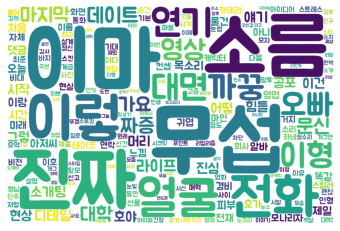

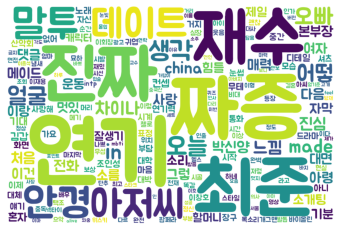

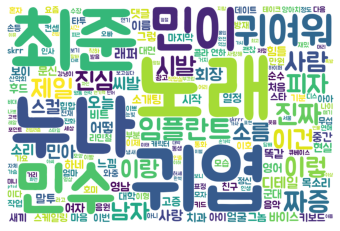

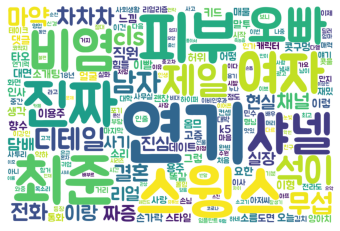

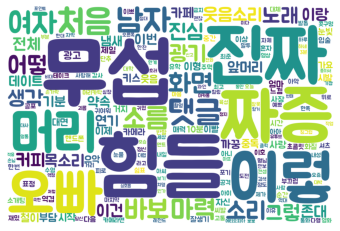

In [ ]:
for i, topic in enumerate(topics):
  draw_cloud(topic, i)

In [ ]:
files.download(name+'방재호.png')
files.download(name+'이호창.png')
files.download(name+'임플란티드키드.png')
files.download(name+'차진석.png')
files.download(name+'최준.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>